In [1]:
from arch import arch_model
import datetime as dt
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin

start = dt.datetime(2000,1,1)
end = dt.datetime(2014,1,1)

yfin.pdr_override()
sp500 = pdr.get_data_yahoo('^GSPC', start=start, end=end)
returns = 100 * sp500['Adj Close'].pct_change().dropna()
am = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')

[*********************100%%**********************]  1 of 1 completed


In [2]:
split_date = dt.datetime(2010,1,1)
res = am.fit(last_obs=split_date)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4296849850.366523
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1097221636.3648314
Iteration:      3,   Func. Count:     22,   Neg. LLF: 3827.4582450947764
Iteration:      4,   Func. Count:     28,   Neg. LLF: 3803.5386646741604
Iteration:      5,   Func. Count:     34,   Neg. LLF: 3811.0761868660447
Iteration:      6,   Func. Count:     40,   Neg. LLF: 3850.925110749849
Iteration:      7,   Func. Count:     46,   Neg. LLF: 3787.3959126110403
Iteration:      8,   Func. Count:     52,   Neg. LLF: 3814.669673829536
Iteration:      9,   Func. Count:     58,   Neg. LLF: 3785.311520696806
Iteration:     10,   Func. Count:     64,   Neg. LLF: 3784.612420783653
Iteration:     11,   Func. Count:     70,   Neg. LLF: 3784.5844273541707
Iteration:     12,   Func. Count:     75,   Neg. LLF: 3784.5843806940425
Iteration:     13,   Func. Count:     79,   Neg. LLF: 3784.5843806937487
Optimization terminated successfully    (Exit mode 0)
  

<Axes: xlabel='Date'>

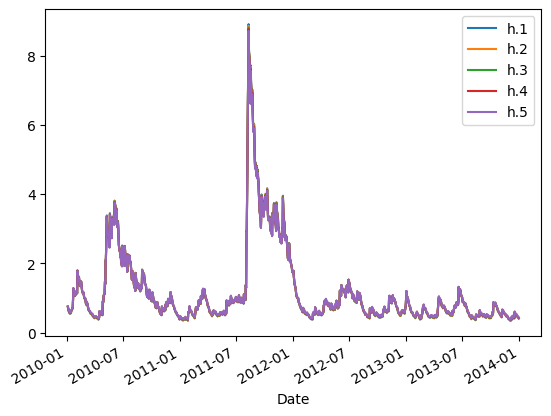

In [3]:
forecasts = res.forecast(horizon=5, start=split_date)
forecasts.variance[split_date:].plot()

<Axes: xlabel='Date'>

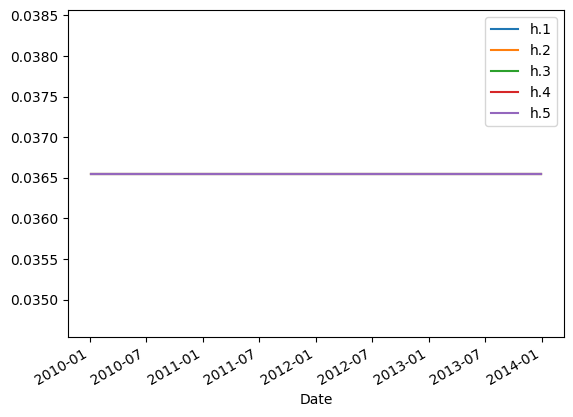

In [4]:
forecasts.mean[split_date:].plot()

In [10]:
forecasts.mean.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2010-01-04,0.036552,0.036552,0.036552,0.036552,0.036552
2010-01-05,0.036552,0.036552,0.036552,0.036552,0.036552
2010-01-06,0.036552,0.036552,0.036552,0.036552,0.036552
2010-01-07,0.036552,0.036552,0.036552,0.036552,0.036552
2010-01-08,0.036552,0.036552,0.036552,0.036552,0.036552
